# PROTOTYPE OF FINAL PROJECT

In [1]:
#IMPORTS

import pandas as pd
import datetime
import seaborn as sns
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import  RobustScaler
from tensorflow.keras.layers import Lambda
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
import os

2022-12-07 12:15:41.679629: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#GETTING CURRENCY RATES

def currency_converter():

    APIkey = "j4YVbY4DsPe2bRdqchwWzvccCljEhg2EhlPyfrEN"
    url = f"https://api.freecurrencyapi.com/v1/latest?apikey={APIkey}"
    response = requests.get(url).json()
    df = pd.DataFrame(response['data'], index=[0])
    return df

currency_converter()

,AUD,BGN,BRL,CAD,CHF,CNY,CZK,DKK,EUR,GBP,...,PHP,PLN,RON,RUB,SEK,SGD,THB,TRY,USD,ZAR
0,1.493637,1.867291,5.235649,1.365095,0.942015,6.996148,23.238091,7.106238,0.955433,0.824367,...,55.881227,4.481577,4.695386,60.551458,10.415155,1.358734,35.090356,18.632194,1,17.331527


In [3]:
#GETTING FEAR GRID VALUES

def fgindex() -> pd.DataFrame:
    """returns a dataframe of fear and greed index with columns:
    [value],[value_classification],[timestamp],[time_until_update] """

    url = 'https://api.alternative.me/fng/'
    params = {'limit':100000,'date_format':'world'}
    response = requests.get(url,params).json()
    fg = pd.DataFrame(response['data'])
    return fg

fgindex()

,value,value_classification,timestamp,time_until_update
0,29,Fear,07-12-2022,-1670325341
1,25,Extreme Fear,06-12-2022,NaN
2,26,Fear,05-12-2022,NaN
3,26,Fear,04-12-2022,NaN
4,27,Fear,03-12-2022,NaN
...,...,...,...,...
1763,11,Extreme Fear,05-02-2018,NaN
1764,24,Extreme Fear,04-02-2018,NaN
1765,40,Fear,03-02-2018,NaN
1766,15,Extreme Fear,02-02-2018,NaN


In [4]:
! pip install Historic-Crypto
from Historic_Crypto import HistoricalData

In [5]:
#GETTING CLOSING PRICES OF CRYPTO CURRENCY

crypto = 'BTC'

def prices(crypto)-> pd.DataFrame:

    today = datetime.datetime.today().strftime('%Y-%m-%d')
    crypto_df = HistoricalData(f'{crypto}-USD',86400,'2018-01-31-00-00',f"{today}-00-00",verbose = False).retrieve_data()
    return crypto_df

prices(crypto)

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00
Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


,low,high,open,close,volume
time,,,,,
2018-02-01,8400.00,10166.25,10099.99,9014.23,38171.970034
2018-02-02,7540.00,9090.08,9014.22,8787.52,52039.268077
2018-02-03,8115.48,9499.00,8787.52,9240.00,23700.985090
2018-02-04,7859.00,9350.00,9227.80,8167.91,24062.181957
2018-02-05,6425.75,8349.16,8167.90,6905.19,59578.698221
...,...,...,...,...,...
2022-12-03,16863.58,17158.42,17094.25,16888.53,14081.450672
2022-12-04,16882.86,17199.99,16889.17,17108.90,16961.108288
2022-12-05,16865.22,17424.59,17108.90,16966.05,33618.451090


In [6]:
def data_cleaning(crypto = 'BTC'):
    '''The function returns a dataframe containing:
    price: the historical crypto price
    index: the Grid/fear index value
    '''
    #cleaning the price data

    BTC_USD = prices(crypto)
    BTC_USD= BTC_USD['close']

    #cleaning the sentiment data
    sentiment_data = fgindex()
    sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
    sentiment_data['value'] = sentiment_data['value'].astype('float')
    fg= pd.DataFrame(sentiment_data[['value', 'timestamp']])
    fg.set_index('timestamp', inplace=True)


    #merging the price and sentiment data
    df = fg.join(BTC_USD)

    #cleaning the merged dataframe
    df.dropna(inplace=True)
    df.rename(columns = {'close': 'price', 'value': 'index'}, inplace = True)

    return df

df = data_cleaning()

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00
Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00
Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '30-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '29-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '28-11-2022' in DD/MM/YY

In [7]:
# This function accepts the column number for the features (X) and the target (y)
# It chunks the data up with a rolling window of Xt-n to predict Xt
# It returns a numpy array of X any y
import numpy as np

def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [8]:

# Predict Closing Prices using a 10 day window of fear and greed index values and a target of the 11th day closing price
# Try a window size anywhere from 1 to 10 and see how the model performance changes
window_size = 10

# Column index 1 is the `Close` column
feature_column = 0
target_column = 1
X, y = window_data(df, window_size, feature_column, target_column)

In [9]:
# Use 70% of the data for training and the remainder for testing

# x split
split = int(.7 * len(X))
X_train = X[:split - 1]
X_test = X[split:]

# y split
y_train = y[:split - 1]
y_test = y[split:]

In [10]:
df.dtypes

index    float64
price    float64
dtype: object

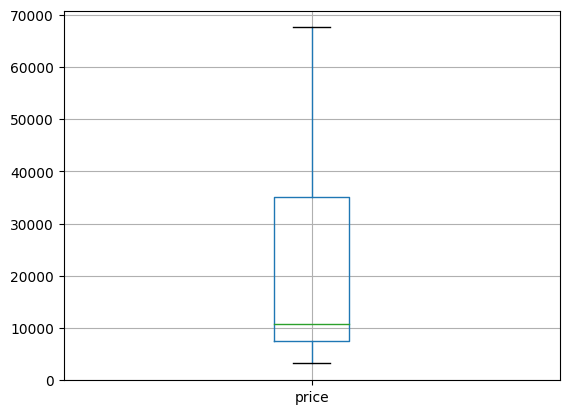

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

boxplot = df.boxplot(column=['price'])


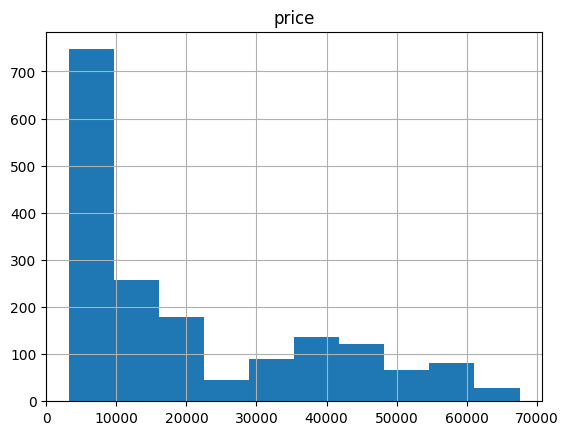

In [12]:
histogram = df.hist(column=['price'])
plt.show()

In [13]:
def window_data(crypto='BTC',window=10):
    """returns two arrays:
    X : Array of lists. Each list contains n_window observations of features.
    y: Array of lists. Each list contains the price of obs n_window + 1
    """
    df = data_cleaning(crypto)
    feature_column = df.columns.get_loc('index')
    target_column = df.columns.get_loc('price')
    X = []
    y = []

    for i in range(len(df) - window - 1):
        features = df.iloc[i:(i + window), feature_column]
        target = df.iloc[(i + window), target_column]
        X.append(features)
        y.append(target)

    return np.array(X), np.array(y).reshape(-1, 1)

window_data()

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00
Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00
Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '30-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '29-11-2022' in DD/MM/YYYY f

(array([[29., 25., 26., ..., 29., 26., 28.],
        [25., 26., 26., ..., 26., 28., 26.],
        [26., 26., 27., ..., 28., 26., 22.],
        ...,
        [71., 55., 35., ..., 30., 36.,  8.],
        [55., 35., 42., ..., 36.,  8., 11.],
        [35., 42., 31., ...,  8., 11., 24.]]),
 array([[16419.88],
        [16450.93],
        [16510.9 ],
        ...,
        [ 9190.48],
        [ 7045.01],
        [11000.  ]]))

In [14]:
def folds(crypto='BTC',window=10):
    """ returns four arrays:
    X_train : array of lists with the 70% of the observed feature values
    X_test : array of lists with the 30% of the observed feature values
    y_train : array of lists with the 70% of the observed target values
    y_test : array of lists with the 30% of the observed target values
    """

    X, y = window_data(crypto,window)
    split = int(.7 * len(X))
    X_train = X[:split - 1]
    X_test = X[split:]

    # y split
    y_train = y[:split - 1]
    y_test = y[split:]

    return X_train,X_test,y_train,y_test

folds()

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00
Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00
Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '30-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '29-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '28-11-2022' in DD/MM/YY

(array([[29., 25., 26., ..., 29., 26., 28.],
        [25., 26., 26., ..., 26., 28., 26.],
        [26., 26., 27., ..., 28., 26., 22.],
        ...,
        [66., 64., 62., ..., 22., 19., 16.],
        [64., 62., 61., ..., 19., 16., 47.],
        [62., 61., 61., ..., 16., 47., 24.]]),
 array([[61., 57., 31., ..., 24., 42., 20.],
        [57., 31., 22., ..., 42., 20., 40.],
        [31., 22., 19., ..., 20., 40., 42.],
        ...,
        [71., 55., 35., ..., 30., 36.,  8.],
        [55., 35., 42., ..., 36.,  8., 11.],
        [35., 42., 31., ...,  8., 11., 24.]]),
 array([[16419.88],
        [16450.93],
        [16510.9 ],
        ...,
        [ 9479.98],
        [ 9843.  ],
        [ 9883.33]]),
 array([[ 9840.12],
        [10323.39],
        [10590.7 ],
        [10761.03],
        [10538.06],
        [10649.07],
        [ 9696.31],
        [ 9422.72],
        [10854.47],
        [10185.03],
        [11370.08],
        [ 7502.19],
        [ 9198.84],
        [ 8209.  ],
        [10484.

In [15]:
def scaling(crypto='BTC',window=10):
    """ returns four arrays:
    X_train_scaled : array of lists with the 70% of the observed feature values scaled,
    X_test_scaled : array of lists with the 30% of the observed feature values scaled,
    y_train_scaled : array of lists with the 70% of the observed target values scaled,
    y_test_scaled : array of lists with the 30% of the observed target values scaled.
    """

    scaler = RobustScaler()
    X_train,X_test,y_train,y_test = folds(crypto,window)

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    y_train_scaled = scaler.fit_transform(y_train)
    y_test_scaled = scaler.transform(y_test)

    return X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled


X_train_scaled,X_test_scaled,y_train_scaled,y_test_scaled= scaling()


Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00
Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00
Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '30-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '29-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '28-11-2022' in DD/MM/YY

In [16]:
def reshape(crypto='BTC',window=10):
    X_train_scaled,X_test_scaled = scaling(crypto,window)[0],scaling(crypto,window)[1]
    X_train = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
    X_test = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
    return X_train,X_test

X_train,X_test = reshape()

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00
Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '30-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '29-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '28-11-2022' in DD/MM/YY

Provisional Start: 2018-01-31T00:00:00
Provisional End: 2018-11-27T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2018-11-27T00:00:00
Provisional End: 2019-09-23T00:00:00
Provisional Start: 2019-09-23T00:00:00
Provisional End: 2020-07-19T00:00:00
Provisional Start: 2020-07-19T00:00:00
Provisional End: 2021-05-15T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-05-15T00:00:00
Provisional End: 2022-03-11T00:00:00


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-03-11T00:00:00
Provisional End: 2023-01-05T00:00:00


/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '30-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '29-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '28-11-2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  sentiment_data['timestamp'] = pd.to_datetime(sentiment_data['timestamp'])
/var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/ipykernel_14373/1213055458.py:13: UserWarning: Parsing '27-11-2022' in DD/M

## Baseline Model

In [17]:
def init_baseline():


    model = models.Sequential()
    model.add(layers.Lambda(lambda x: x[:,-1,0,None]))

    adam = optimizers.Adam(learning_rate=0.02)
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])

    return model

baseline_model = init_baseline()

2022-12-07 12:16:29.153208: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
baseline_model.fit(X_train, y_train)

39/39 [==============================] - 0s 1ms/step - loss: 1008960640.0000 - mae: 26440.2383


In [19]:
baseline_score = baseline_model.evaluate(X_test, y_test_scaled)

17/17 [==============================] - 0s 1ms/step - loss: 0.4431 - mae: 0.5054


In [20]:
! pip install mlflow==1.26.1

In [21]:
import mlflow
from mlflow.tracking import MlflowClient
import os
from tensorflow.keras import Model, models

MLFLOW_TRACKING_URI="https://mlflow.lewagon.ai"
MLFLOW_EXPERIMENT="batch1091_gossips_cryptos"
MLFLOW_MODEL_NAME="gossips_cryptos_model"


def save_model(model: Model = None,
               params: dict = None,
               metrics: dict = None) -> None:
    """
    persist trained model, params and metrics
    """

    mlflow_tracking_uri = MLFLOW_TRACKING_URI
    mlflow_experiment = MLFLOW_EXPERIMENT
    mlflow_model_name = MLFLOW_MODEL_NAME

    mlflow.set_tracking_uri(mlflow_tracking_uri)
    mlflow.set_experiment(experiment_name=mlflow_experiment)

    with mlflow.start_run():

        #if params is not None:
            #mlflow.log_params(params)

        #if metrics is not None:
            #mlflow.log_metrics(metrics)

        if model is None:

            mlflow.keras.log_model(keras_model=baseline_model,
                                       artifact_path="model",
                                       keras_module="tensorflow.keras",
                                       registered_model_name=mlflow_model_name)


In [22]:
save_model()

INFO:tensorflow:Assets written to: /var/folders/g3/7plbk7pj6pn0bvcxx93h4fs40000gn/T/tmpmkvdsx0k/model/data/model/assets


/Users/marksarifidis/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")
Successfully registered model 'gossips_cryptos_model'.
2022/12/07 12:16:50 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation.                     Model name: gossips_cryptos_model, version 1
Created version '1' of model 'gossips_cryptos_model'.
